<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv')

In [3]:
display(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

In [4]:
display(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

None

In [5]:
display(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


None

In [6]:
display(data_train.head())
display(data_test.head())
display(data_full.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [7]:
display(data_train.describe())
display(data_test.describe())
display(data_full.describe())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


# Проверка правильности расчета эффективности обогащения

In [8]:
#проверим на обучающей выборке, что эффективность обогащения рассчитана правильно
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
recovery = (C * (F - T)) / (F * (C - T)) * 100

print('MAE = ', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

MAE =  9.83758577644259e-15


**Вывод:**

При проверке правильности расчета эффективности обогащения золота, было получено значение метрики MAE = 9.84 * 10**-15.

Значение метрики близкое к нулю говорит о том, что формула расчета эффективности обогащения правильна

# Анализ признаков в тестовой выборке

In [9]:
#найдем признаки из обучающей выборки, недоступные в тестовой
different_train_test = set(data_train.columns) - set(data_test.columns)
different_train_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

**Вывод:**

  В тестовой выборке недоступны такие признаки, как доли элементов в черновом и финальном концентратах, на выходе после первичной и вторичной очистки, а также расчетных характеристик содержания золота в концентрате и соотношения золота и свинца

# Предобработка данных

In [10]:
#посмотрим количество пропусков
data_train.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           920
rougher.state.floatbank10_e_air             429
rougher.input.floatbank11_xanthate          407
primary_cleaner.output.concentrate_sol      265
final.output.concentrate_sol                192
                                           ... 
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_level      0
primary_cleaner.output.concentrate_au         0
primary_cleaner.state.floatbank8_b_level      0
Length: 87, dtype: int64

In [11]:
#применим метод ffill для замены значений
data_train = data_train.fillna(method='ffill')

In [12]:
data_test.isna().sum().sort_values(ascending=False)

secondary_cleaner.state.floatbank2_a_air      126
rougher.input.floatbank11_xanthate             46
rougher.input.feed_size                        44
primary_cleaner.input.xanthate                 43
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
primary_cleaner.input.depressant                9
rougher.input.floatbank11_sulfate               8
rougher.state.floatbank10_e_air                 7
rougher.input.feed_rate                         4
rougher.input.floatbank10_sulfate               3
primary_cleaner.state.floatbank8_d_air          2
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_d_level        1
secondary_cleaner.state.floatbank3_a_level      1
secondary_cleaner.state.floatbank2_a_level      1
secondary_cleaner.state.floatbank2_b_air        1
secondary_cleaner.state.floatbank2_b_level      1
secondary_cleaner.state.floatbank3_a_air        1
secondary_cleaner.state.floatbank4_a_air        1


In [13]:
data_test = data_test.fillna(method='ffill')

In [14]:
data_full.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.output.tail_sol                        0
primary_cleaner.input.feed_size                0
rougher.input.feed_au                          0
primary_cleaner.output.concentrate_au          0
date                                           0
Length: 87, dtype: int64

In [15]:
data_full = data_full.fillna(method='ffill')

In [16]:
#заменим тип данных столбца date на datetime
for data in [data_full, data_train, data_test]:
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

In [17]:
#добавим к тестовой выборке целевые признаки
data_test = data_test.merge(data_full[['date','rougher.output.recovery',
                                 'final.output.recovery']],
                        how='left', on='date')

In [18]:
#удалим признак date, чтобы он не мешал обучению моделей
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

**Вывод:**

Применили метод `ffill` для заполнения пропущенных значений, так как данные заполняются каждый час, поэтому заполнять пропущенные значения предыдущими данными будет самым лучшим решением.

Привели столбец `date` к типу данных `datetime`.

Добавили к тестовой выборке целевые признаки.

Удалили признак `date` из обучающей и тестовой выборки, чтобы он не мешал обучению моделей.

## Анализ данных

# Изменение концентрация металлов на разных этапах 

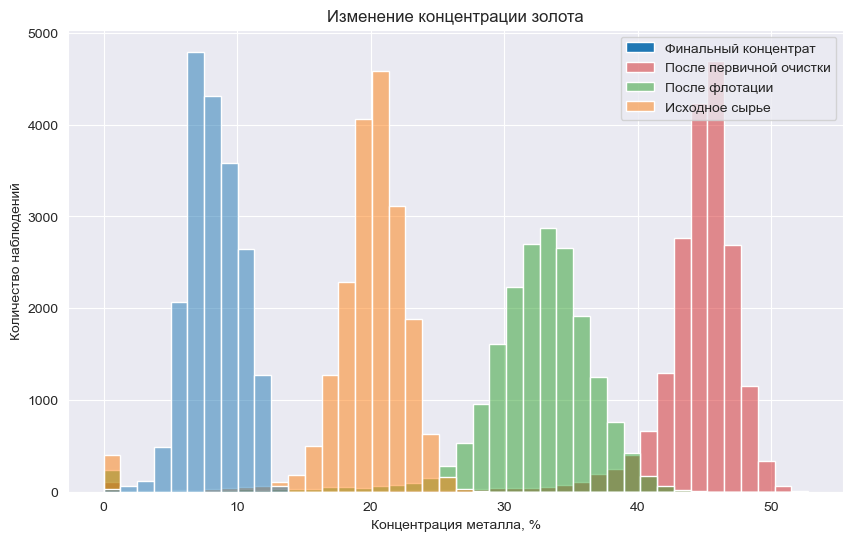

In [19]:
#построим гистограмму для золота
concentrate_au = data_full[['rougher.input.feed_au',
                            'rougher.output.concentrate_au',
                            'primary_cleaner.output.concentrate_au',
                            'final.output.concentrate_au']]
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.histplot(data=concentrate_au)
plt.title('Изменение концентрации золота')
plt.legend(['Финальный концентрат',
            'После первичной очистки',
            'После флотации',
            'Исходное сырье'],
           loc='upper right')
plt.xlabel('Концентрация металла, %')
plt.ylabel('Количество наблюдений')
plt.show()

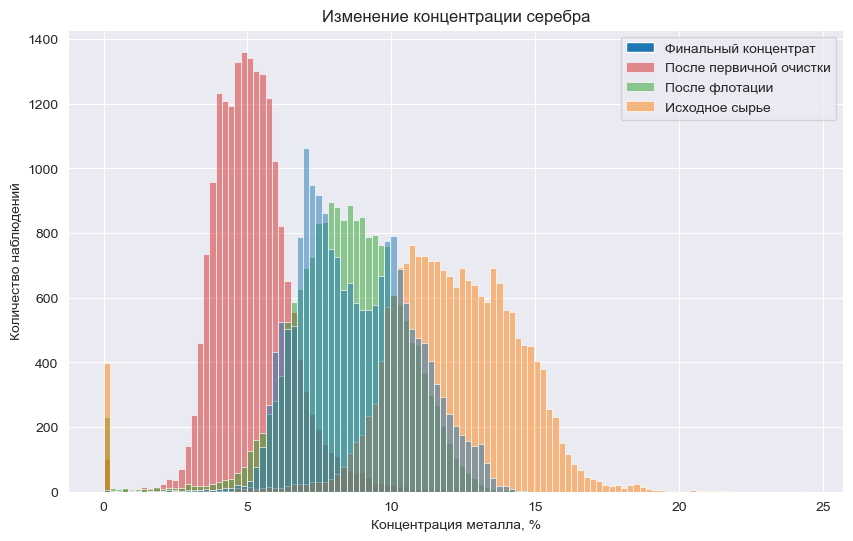

In [20]:
#построим гистограмму для серебра
concentrate_ag = data_full[['rougher.input.feed_ag',
                            'rougher.output.concentrate_ag',
                            'primary_cleaner.output.concentrate_ag',
                            'final.output.concentrate_ag']]

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=concentrate_ag)
plt.title('Изменение концентрации серебра')
plt.legend(['Финальный концентрат',
            'После первичной очистки',
            'После флотации',
            'Исходное сырье'],
           loc='upper right')
plt.xlabel('Концентрация металла, %')
plt.ylabel('Количество наблюдений')
plt.show()

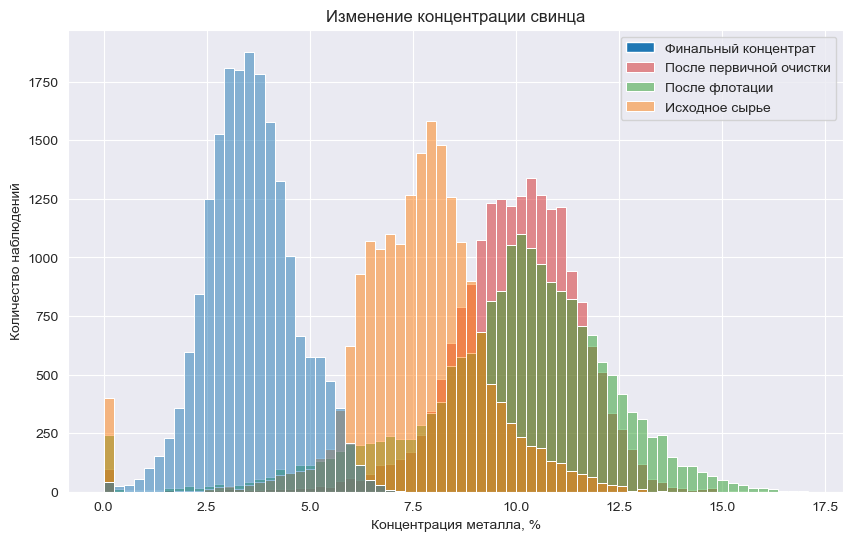

In [21]:
#построим гистограмму для свинца
concentrate_pb = data_full[['rougher.input.feed_pb',
                            'rougher.output.concentrate_pb',
                            'primary_cleaner.output.concentrate_pb',
                            'final.output.concentrate_pb']]

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=concentrate_pb)
plt.title('Изменение концентрации свинца')
plt.legend(['Финальный концентрат',
            'После первичной очистки',
            'После флотации',
            'Исходное сырье'],
           loc='upper right')
plt.xlabel('Концентрация металла, %')
plt.ylabel('Количество наблюдений')
plt.show()

**Вывод:**

По графикам видно, что в при восстановлении золота из исходного сырья концентрация золота возрастает, в конце восстановления концентрация золота равна около 45%.

Концентрация серебра начинает снижаться уже на этапе первичной очистки и в финальном концентрате составляет меньше 5%.

Концентрация свинца в финальном концентрате достигает около 10%.

На каждом распределении мы видим выбросы около нуля на этапах `После флотации` и `После первичной очистки`. Эти данные обозначим, как выбросы, не входящие в межквартильный интервал, и удалим их из нашей выборки.

# Удаление выбросов

In [22]:
#напишем функцию для вычисления межквартильного интервала
def get_iqr_values(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    minimum  = q1 - 1.5 * iqr
    maximum = q3 + 1.5 * iqr
    return minimum, maximum

#напишем функцию которая выводит датасет без выбросов
def remove_outliers(data, col):
    minimum, maximum = get_iqr_values(data, col)
    data_out = data.loc[(data[col] > minimum) & (data[col] < maximum)]
    return data_out

In [23]:
#применим функцию к данным
for i in ['ag', 'pb', 'sol', 'au']:
    data_full = remove_outliers(data_full, f'rougher.output.concentrate_{i}')
    data_full = remove_outliers(data_full, f'primary_cleaner.output.concentrate_{i}')
    data_full = remove_outliers(data_full, f'final.output.concentrate_{i}')
    data_train = remove_outliers(data_train, f'rougher.output.concentrate_{i}')
    data_train = remove_outliers(data_train, f'primary_cleaner.output.concentrate_{i}')
    data_train = remove_outliers(data_train, f'final.output.concentrate_{i}')

# Сравнение распределения размеров гранул

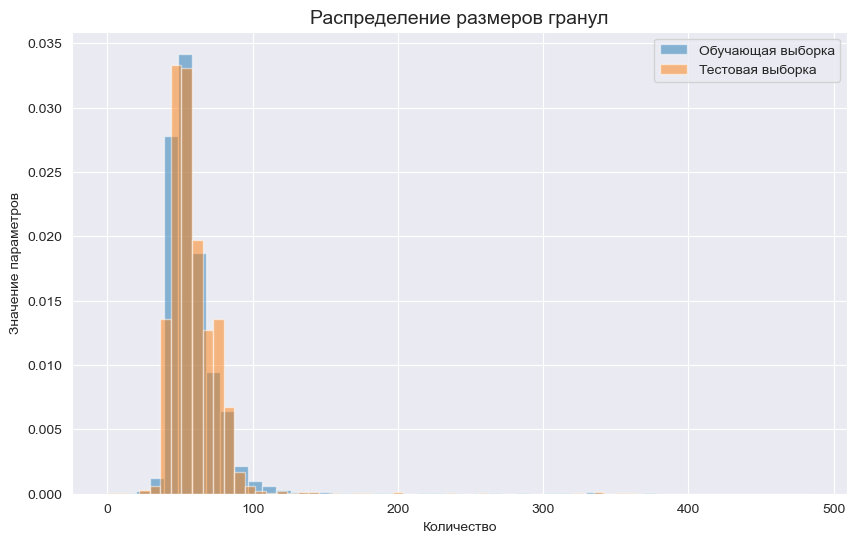

In [24]:
#построим гистограммы
data_train['rougher.input.feed_size'].hist(
    alpha=0.5,
    bins=50,
    figsize=(10, 6),
    density=True)
data_test['rougher.input.feed_size'].hist(
    alpha=0.5,
    bins=50,
    figsize=(10, 6),
    density=True)
plt.legend(['Обучающая выборка', 'Тестовая выборка'], fontsize=10)
plt.title('Распределение размеров гранул',
          fontsize=14)
plt.xlabel('Количество', fontsize=10)
plt.ylabel('Значение параметров', fontsize=10)
plt.show()

In [25]:
data_train['rougher.input.feed_size'].describe()

count    10902.000000
mean        59.284088
std         22.237349
min          0.049194
25%         47.598887
50%         54.615425
75%         64.745641
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [26]:
data_test['rougher.input.feed_size'].describe()

count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

**Вывод:**

Распределение размеров гранул исходного сырья почти одинаковое на тестовой и обучающей выборках и составляет 54-55

# Исследование суммарной концентрации металлов на разных стадиях

In [27]:
#найдем суммарную концентрацию металлов (ag, pb, sol, au) в сырье
sum_r_feed = data_full[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)
#найдем суммарную концентрацию металлов (ag, pb, sol, au) в черновом концентрате
sum_r_conc = data_full[['rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)
#найдем суммарную концентрацию металлов (ag, pb, sol, au) в концентрате после первой очистки 
sum_prim_conc = data_full[['primary_cleaner.output.concentrate_ag', 
                   'primary_cleaner.output.concentrate_pb', 
                   'primary_cleaner.output.concentrate_sol', 
                   'primary_cleaner.output.concentrate_au']].sum(axis=1)
#найдем суммарную концентрацию металлов (ag, pb, sol, au) в финальном концентрате
sum_fin_conc = data_full[['final.output.concentrate_ag', 
                   'final.output.concentrate_pb', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)

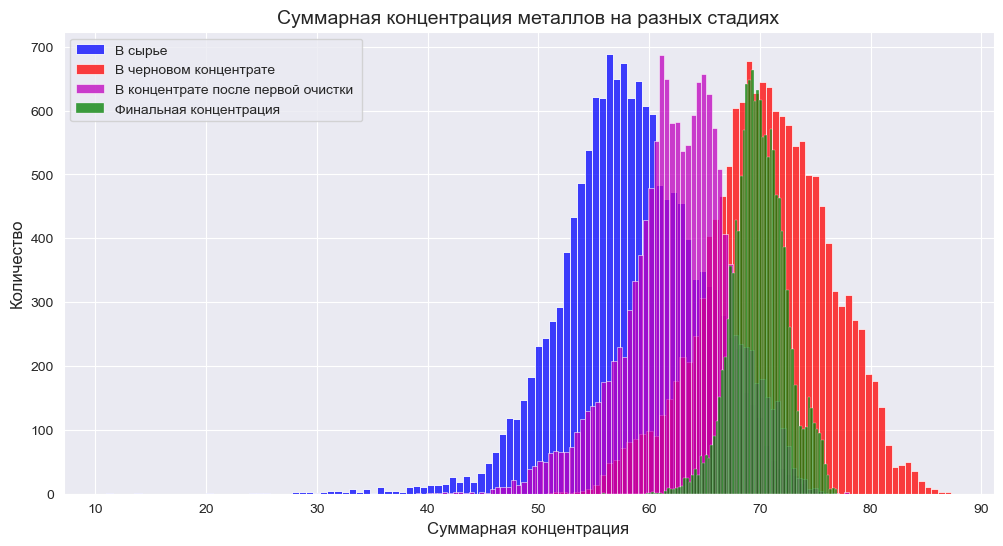

In [28]:
#построим общую гистограмму
plt.figure(figsize=(12, 6))
sns.histplot(sum_r_feed,
             label='В сырье',
             color='b',
             kde=False)
sns.histplot(sum_r_conc,
             label='В черновом концентрате',
             color='r',
             kde=False)
sns.histplot(sum_prim_conc,
             label='В концентрате после первой очистки ',
             color='m',
             kde=False)
sns.histplot(sum_fin_conc,
             label='Финальная концентрация',
             color='g',
             kde=False)
plt.title('Суммарная концентрация металлов на разных стадиях',
          fontsize=14)
plt.xlabel('Суммарная концентрация', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend()
plt.show()

**Вывод:**

На гистограмме видно, что суммарная концентрация металла растет

## Модель

# Функция вычисления итоговой sMAPE

In [29]:
#напишем функцию, которая вычисляет метрику sMAPE для каждого признака
def smape(target, predict):
    smape = 1/(len(target)) * sum(abs(target - predict) \
                / ((abs(target) + abs(predict)) / 2)) * 100
    return smape

In [30]:
#напишем функцию вычисляющую итоговую sMAPE
def final_smape(rougher, final):
    final_smape = 0.25 * rougher + 0.75 * final
    return final_smape

In [31]:
smape_score = make_scorer(smape, greater_is_better = False)

# Обучие и проверка нескольких моделей

In [32]:
RANDOM_STATE = 12345

In [33]:
#поделим данные на features и target
features_train = data_train.drop(columns=different_train_test, axis=1)
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

In [34]:
#машстабируем признаки
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

In [35]:
#обучим модель дерева решений
def dtr_learn(features, target):
    best_result = 20
    best_depth = 0
    for depth in tqdm(range(2, 12, 2)):
        model = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_STATE)
        smape = cross_val_score(model, features, target, scoring=smape_score, n_jobs=-1, cv=5).mean()
    if smape < best_result:
        best_result = smape
        best_depth = depth

    return smape, model

In [36]:
%%time

smape_dtr_rougher, model_dtr_rougher = dtr_learn(features_train, target_train_rougher)
smape_dtr_final, model_dtr_final = dtr_learn(features_train, target_train_final)
print('Лучшая модель для признака rougher:', model_dtr_rougher)
print('Лучшая модель для признака final:', model_dtr_final)
print(f'Наилучший показатель sMAPE: {final_smape(smape_dtr_rougher, smape_dtr_final) * (-1)}')

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.29it/s]

Лучшая модель для признака rougher: DecisionTreeRegressor(max_depth=10, random_state=12345)
Лучшая модель для признака final: DecisionTreeRegressor(max_depth=10, random_state=12345)
Наилучший показатель sMAPE: 10.814396240985813
CPU times: total: 203 ms
Wall time: 11.9 s


In [37]:
#обучим модель случайного леса
def rfr_learn(features, target):
    best_result = 20
    best_estim = 0
    best_depth = 0
    for estim in range(1, 51, 10):
        for depth in tqdm(range(2, 11)):
            model = RandomForestRegressor(n_estimators=estim, max_depth=depth, n_jobs=-1, random_state=RANDOM_STATE)
            smape = cross_val_score(model, features, target, scoring=smape_score, n_jobs=-1, cv=5).mean()
    if smape < best_result:
        best_result = smape
        best_depth = depth

    return smape, model

In [38]:
%%time

smape_rfr_rougher, model_rfr_rougher = rfr_learn(features_train, target_train_rougher)
smape_rfr_final, model_rfr_final = rfr_learn(features_train, target_train_final)
print(f'Лучшая модель для признака rougher: {model_rfr_rougher}')
print(f'Лучшая модель для признака final: {model_rfr_final}')
print(f'Наилучший показатель sMAPE: {final_smape(smape_rfr_rougher, smape_rfr_final) * (-1)}')

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:02<00:00, 13.58s/it]

Лучшая модель для признака rougher: RandomForestRegressor(max_depth=10, n_estimators=41, n_jobs=-1,
                      random_state=12345)
Лучшая модель для признака final: RandomForestRegressor(max_depth=10, n_estimators=41, n_jobs=-1,
                      random_state=12345)
Наилучший показатель sMAPE: 7.89814544913283
CPU times: total: 1.62 s
Wall time: 10min 16s


In [39]:
%%time

model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher, features_train,  target_train_rougher, scoring=smape_score, cv=5).mean()

model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final, features_train, target_train_final, scoring=smape_score, cv=5).mean()

result_smape = final_smape(smape_rougher, smape_final) * (-1)
print(f'Наилучший показатель sMAPE у модели {model_lr_final}: {result_smape}')

Наилучший показатель sMAPE у модели LinearRegression(): 8.090165843994061
CPU times: total: 1.17 s
Wall time: 468 ms


**Вывод:**

Обучили три разные модели. 
Получили результаты:
- Дерево решений = 10.81
- Случайный лес = 7.90
- Линейная регрессия = 8.09

Лучший результат показала модель случайного леса, её выберем для проверки на тестовой выборке.

# Проверка лучшей модели на тестовой выборке

In [40]:
#поделим данные на features и target
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

#масштабируем признаки
features_test = scaler.transform(features_test)

In [41]:
#обучим модель случайного леса на тестовой выборке
model_rfr_rougher = RandomForestRegressor(n_estimators=41, max_depth=10, random_state=RANDOM_STATE)
model_rfr_final = RandomForestRegressor(n_estimators=41, max_depth=10, random_state=RANDOM_STATE)

model_rfr_rougher.fit(features_train, target_train_rougher)
model_rfr_final.fit(features_train, target_train_final)

rougher_test_predict = model_rfr_rougher.predict(features_test)
final_test_predict = model_rfr_final.predict(features_test)

smape_rougher_test = smape(target_test_rougher, rougher_test_predict)
smape_final_test = smape(target_test_final, final_test_predict)

result_smape = final_smape(smape_rougher_test, smape_final_test)
print('Итоговое sMAPE на тестовой выборке:', result_smape)

Итоговое sMAPE на тестовой выборке: 5.872514432107605


# Проверка на адекватность

In [42]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_final = DummyRegressor(strategy="mean")

dummy_rougher.fit(features_train, target_train_rougher)
dummy_final.fit(features_train, target_train_final)

dummy_predicted_rougher = dummy_rougher.predict(features_test)
dummy_predicted_final = dummy_final.predict(features_test)

smape_const_rougher = smape(target_test_rougher, dummy_predicted_rougher)
smape_const_final = smape(target_test_final, dummy_predicted_final)

final_smape_const = final_smape(smape_const_rougher, smape_const_final)
print(f'Показатель sMAPE у модели: {final_smape_const}')

Показатель sMAPE у модели: 8.318770836258688


**Вывод:**

Лучшей моделью стал `RandomForestRegressor`. Он дал результат метрики sMAPE равный 7.90 на обучающей выборке и 5.87 на тестовой. При этом константная модель показала результат 8.32

# Общий вывод:

1. Подготовили данные.
2. Сделали предобработку данных.
3. Проанализировали данные.
4. Обучили модели и вычислили sMAPE.
5. Лучшей моделью стал случайный лес, константная модель на тестовых данных показала метрику sMAPE = 8.32.